# Evaliating number of 1-dimensional diistribution modes with clustering

### Resume: "K-means" works, with evaluation of optimal number of clusters based on either of the two:

- Maximising "Silhouette Coefficient" (SC), which appears generally more intuitive but does not work for K=1
  - https://en.wikipedia.org/wiki/Silhouette_(clustering) 
  - https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c
- Minimizing "Normaised Mean Centroid Distance" (NMCD), which appears generally less intuitive but works for K=1
  - https://www.researchgate.net/publication/221020638_Cluster_Validity_Measures_Based_on_the_Minimum_Description_Length_Principle
- Using SC if it is above threshold 0.65 or NMCD otherwise (seems generally optimal)

### Note:
- https://pypi.org/project/diptest/ - normal vs. multi-modal distributions only, no assessment for N modeas ("K means") 

### TODO
- Compare with Human via Google Forms vote


In [1]:
import os, sys
cwd = os.getcwd()
project_path = cwd[:cwd.find('pygents')+7]
if project_path not in sys.path: sys.path.append(project_path)
os.chdir(project_path) 

import math
import pandas as pd
import numpy as np
import random

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

#force reimport
if 'pygents.util' in sys.modules:
    del sys.modules['pygents.util']
if 'pygents.plot' in sys.modules:
    del sys.modules['pygents.plot']

from pygents.util import dictcount
from pygents.plot import subplots_hist


### Experiment with DBSCAN and Silhouette

In [2]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

centers = [[1, 1], [-1, -1], [1, -1]]

X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print(len(X),len(labels))
print(X)
print(labels)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
750 750
[[ 0.49426097  1.45106697]
 [-1.42808099 -0.83706377]
 [ 0.33855918  1.03875871]
 ...
 [-0.05713876 -0.90926105]
 [-1.16939407  0.03959692]
 [ 0.26322951 -0.92649949]]
[ 0  1  0  2  0  1  1  2  0  0  1  1  1  2  1  0 -1  1  1  2  2  2  2  2
  1  1  2  0  0  2  0  1  1  0  1  0  2  0  0  2  2  1  1  1  1  1  0  2
  0  1  2  2  1  1  2  2  1  0  2  1  2  2  2  2  2  0  2  2  0  0  0  2
  0  0  2  1 -1  1  0  2  1  1  0  0  0  0  1  2  1  2  2  0  1  0  1 -1
  1  1  0  0  2  1  2  0  2  2  2  2 -1  0 -1  1  1  1  1  0  0  1  0  1
  2  1  0  0  1  2  1  0  0  2  0  2  2  2  0 -1  2  2  0  1  0  2  0  0
  2  2 -1  2  1 -1  2  1  1  2  2  2  0  1  0  1  0  1  0  2  2 -1  1  2
  2  1  0  1  2  2  2  1  1  2  2  0  1  2  0  0  2  0  0  1  0  1  0  1
  1  2  2  0  0  1  1  2  1  2  2  2  2  0  2  0  2  

### Experiment with K-means

In [3]:
X = np.array([[1, 2], [1, 4], [1, 0],
             [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
#array([1, 1, 1, 0, 0, 0], dtype=int32)
kmeans.predict([[0, 0], [12, 3]])
#array([1, 0], dtype=int32)
kmeans.cluster_centers_
#array([[10.,  2.],
#       [ 1.,  2.]])


array([[10.,  2.],
       [ 1.,  2.]])

In [4]:
X = np.array([[1], [3], [2],
             [11], [13], [12]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
#array([1, 1, 1, 0, 0, 0], dtype=int32)
kmeans.predict([[0], [10]])
#array([1, 0], dtype=int32)
kmeans.cluster_centers_


array([[12.],
       [ 2.]])

### Experiments with K-means 


In [5]:
x = [7,12,11,101,98,101] # => 10, 100
print(np.mean(x))

def find_modes(data):
    print(data)
    sorted_data = sorted(data)
    print(sorted_data)
    agg_data = {}
    for val in data:
        dictcount(agg_data,val)
    print(agg_data)
            
print(find_modes(x))


55.0
[7, 12, 11, 101, 98, 101]
[7, 11, 12, 98, 101, 101]
{7: 1, 12: 1, 11: 1, 101: 2, 98: 1}
None


In [6]:
X = np.array([[xi] for xi in x])
print(X)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.labels_
print(kmeans.labels_)
kmeans.predict([[0], [10]])
#array([1, 0], dtype=int32)
print(kmeans.cluster_centers_)

print(metrics.silhouette_score(X, labels))


[[  7]
 [ 12]
 [ 11]
 [101]
 [ 98]
 [101]]
[1 1 1 0 0 0]
[[100.]
 [ 10.]]
0.9703956940727511


### Design evaluation functions 

In [7]:
def centrod_distance_norm(x,labels,centroids):
    #TODO get rid of sum_0 which can be negative!!!
    mean = np.sum(x) / len(x) # mean of value distribution
    sum_m = 0
    sum_d = 0
    for i in range(len(x)): # sum of value distances from meean and centroids
        sum_m += abs(x[i] - mean)
        sum_d += abs(x[i] - centroids[labels[i]][0])
    for c in centroids: # sum of centroid distances from the distribution mean
        sum_d += abs(c[0] - mean)
    return 0 if sum_m == 0 else sum_d / sum_m # "shortest description" denominated by "mean-based description"

def centrod_distance_norm_centroids(x,labels,centroids):
    return len(centroids) * centrod_distance_norm(x,labels,centroids)

def cluster_Kmeans_optimal(x, Kmax = 10, random_state = 0, silhouette_threshold = 0.65, debug = False):
    """
    Uses Silhouette if above threshold, mean norm centroid distance otherwise  
    """
    X = np.array([[xi] for xi in x])
    K = min(Kmax,len(X))+1
    res = []
    for k in range(1,K):
        if k > 1:
            kmeans = KMeans(n_clusters=k, random_state=random_state).fit(X)
            labels = kmeans.labels_
            centers = kmeans.cluster_centers_
        else:
            labels = [0 for xi in x]
            centers = [[np.mean(x)]]
        si = metrics.silhouette_score(X, labels) if len(centers) > 1 and len(set(labels)) > 1 else 0.0 
        d = centrod_distance_norm_centroids(x, labels, centers)
        res.append((k,d,si,labels,centers))
        if debug:
            print(k,d,si)#,str([c[0] for c in centers]))
    # first, find best by Silhouette 
    Dmin = None
    margin = None
    Kopt = None
    labels_opt = None
    centers_opt = None
    silhouette_opt = None
    for r in res:
        if r[2] >= silhouette_threshold:
            if silhouette_opt is None or silhouette_opt < r[2]:
                if not silhouette_opt is None:
                    exceed = (r[2] - silhouette_opt)/r[2] # update diff between winner and successor 
                Kopt = r[0]
                Dmin = r[1]
                silhouette_opt = r[2]
                labels_opt = r[3]
                centers_opt = r[4]
    if Kopt is None:
        for r in res:
            if Dmin is None or Dmin > r[1]:
                if not Dmin is None:
                    margin = (Dmin - r[1])/r[1] # update diff between winner and successor 
                Kopt = r[0]
                Dmin = r[1]
                silhouette_opt = r[2]
                labels_opt = r[3]
                centers_opt = r[4]
    return Kopt, Dmin, margin, silhouette_opt, labels_opt, [c[0] for c in centers_opt]


def cluster_Kmeans_min_distance(x, Kmax = 10, random_state = 0, debug = False):
    """
    Uses mean norm centroid distance only   
    """
    X = np.array([[xi] for xi in x])
    K = min(Kmax,len(X))+1
    Dmin = None
    Deval = None
    Kopt = None
    labels_opt = None
    centers_opt = None
    silhouette_opt = None
    for k in range(1,K):
        if k > 1:
            kmeans = KMeans(n_clusters=k, random_state=random_state).fit(X)
            labels = kmeans.labels_
            centers = kmeans.cluster_centers_
        else:
            labels = [0 for xi in x]
            centers = [[np.mean(x)]]
        si = metrics.silhouette_score(X, labels) if len(centers) > 1 and len(set(labels)) > 1 else 1.0 
        d = centrod_distance_norm_centroids(x, labels, centers)
        if debug:
            print(k,d,si)#,str([c[0] for c in centers]))
        if Dmin is None or Dmin > d:
            if not Dmin is None:
                Deval = (Dmin - d)/d # update diff between winner and successor 
            Dmin = d
            Kopt = k
            labels_opt = labels
            centers_opt = centers
            silhouette_opt = si
    return Kopt, Dmin, Deval, silhouette_opt, labels_opt, [c[0] for c in centers_opt]


def cluster_Kmeans_max_silhouette_proximity(x, Kmax = 10, random_state = 0, debug = False):
    """
    Uses Silhouette blended with mean norm centroid distance in unusable way   
    """
    if debug:
        print()
    X = np.array([[xi] for xi in x])
    K = min(Kmax,len(X))+1
    SIPmax = None
    exceed = None
    Kopt = None
    labels_opt = None
    centers_opt = None
    silhouette_opt = None
    distance_opt = None
    for k in range(1,K):
        if k > 1:
            kmeans = KMeans(n_clusters=k, random_state=random_state).fit(X)
            labels = kmeans.labels_
            centers = kmeans.cluster_centers_
        else:
            labels = [0 for xi in x]
            centers = [[np.mean(x)]]
        # TODO Silhouette = 0 for 1 cluster!!! 
        si = metrics.silhouette_score(X, labels) if len(centers) > 1 and len(set(labels)) > 1 else 1.0 
        d = centrod_distance_norm(x, labels, centers)
        sip = si * (1-d)
        if debug:
            print(k,d,si,sip)#,str([c[0] for c in centers]))
        if SIPmax is None or SIPmax < sip:
            if not SIPmax is None:
                exceed = (sip - SIPmax)/sip # update diff between winner and successor 
            SIPmax = sip
            Kopt = k
            labels_opt = labels
            centers_opt = centers
            silhouette_opt = si
            distance_opt = d
    return Kopt, SIPmax, exceed, silhouette_opt, labels_opt, [c[0] for c in centers_opt]


for rs in [0,1,2,10]:
    print(cluster_Kmeans_optimal(x,random_state=rs,debug=False))

for rs in [0,1,2,10]:
    print(cluster_Kmeans_min_distance(x,random_state=rs,debug=False))

for rs in [0,1,2,10]:
    print(cluster_Kmeans_max_silhouette_proximity(x,random_state=rs,debug=False))


(2, 0.7407407407407407, None, 0.9703956940727511, array([1, 1, 1, 0, 0, 0], dtype=int32), [100.0, 10.0])
(2, 0.7407407407407407, None, 0.9703956940727511, array([1, 1, 1, 0, 0, 0], dtype=int32), [100.0, 10.0])


/Users/akolonin/Documents/aigents/pygents/env/lib/python3.7/site-packages/ipykernel_launcher.py:25: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.7/site-packages/ipykernel_launcher.py:25: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.7/site-packages/ipykernel_launcher.py:25: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.7/site-packages/ipykernel_launcher.py:25: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.


(2, 0.7407407407407407, None, 0.9703956940727511, array([0, 0, 0, 1, 1, 1], dtype=int32), [10.0, 100.0])
(2, 0.7407407407407407, None, 0.9703956940727511, array([0, 0, 0, 1, 1, 1], dtype=int32), [10.0, 100.0])
(2, 0.7407407407407407, 0.3500000000000001, 0.9703956940727511, array([1, 1, 1, 0, 0, 0], dtype=int32), [100.0, 10.0])
(2, 0.7407407407407407, 0.3500000000000001, 0.9703956940727511, array([1, 1, 1, 0, 0, 0], dtype=int32), [100.0, 10.0])


/Users/akolonin/Documents/aigents/pygents/env/lib/python3.7/site-packages/ipykernel_launcher.py:80: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.7/site-packages/ipykernel_launcher.py:80: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.7/site-packages/ipykernel_launcher.py:80: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.7/site-packages/ipykernel_launcher.py:80: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.


(2, 0.7407407407407407, 0.3500000000000001, 0.9703956940727511, array([0, 0, 0, 1, 1, 1], dtype=int32), [10.0, 100.0])
(2, 0.7407407407407407, 0.3500000000000001, 0.9703956940727511, array([0, 0, 0, 1, 1, 1], dtype=int32), [10.0, 100.0])
(2, 0.6109898814532136, 1.0, 0.9703956940727511, array([1, 1, 1, 0, 0, 0], dtype=int32), [100.0, 10.0])
(2, 0.6109898814532136, 1.0, 0.9703956940727511, array([1, 1, 1, 0, 0, 0], dtype=int32), [100.0, 10.0])
(2, 0.6109898814532136, 1.0, 0.9703956940727511, array([0, 0, 0, 1, 1, 1], dtype=int32), [10.0, 100.0])
(2, 0.6109898814532136, 1.0, 0.9703956940727511, array([0, 0, 0, 1, 1, 1], dtype=int32), [10.0, 100.0])


/Users/akolonin/Documents/aigents/pygents/env/lib/python3.7/site-packages/ipykernel_launcher.py:118: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.7/site-packages/ipykernel_launcher.py:118: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.7/site-packages/ipykernel_launcher.py:118: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.7/site-packages/ipykernel_launcher.py:118: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.


### Test random distributions

A 1 None 1.0
B 3 0.0016301853466242024 0.6029547908260817
C 2 0.2410850855395025 0.7115681184323225
D 2 3.9495689577128794 0.9335968233980341

A 1 None 0.0
B 3 0.0016301853466234226 0.6029547908260817
C 2 None 0.7115681184323225
D 2 None 0.9335968233980341


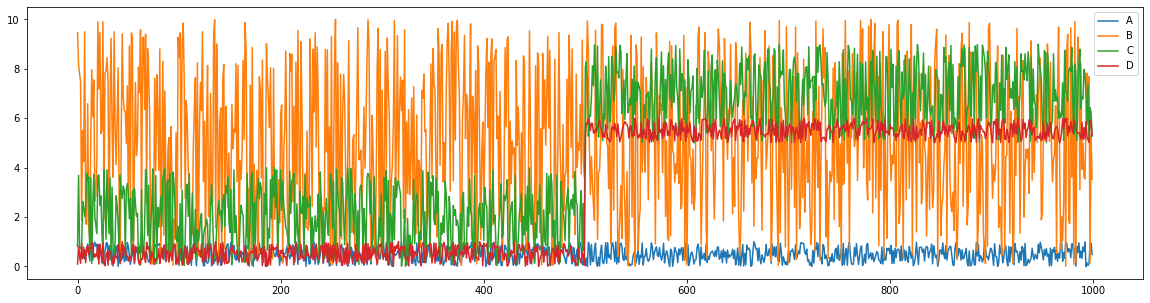

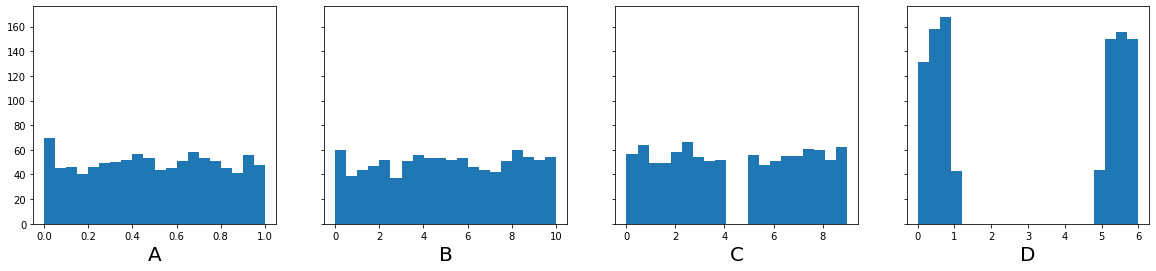

In [8]:
random.seed(0)

x1 = [random.random() for x in range(1000)] 
x10 = [random.random()*10 for x in range(1000)]
df = pd.DataFrame({'A':x1,'B':x10})
df['C'] = [random.random()*4 for x in range(500)] + [random.random()*4+5 for x in range(500,1000)]
df['D'] = [random.random() for x in range(500)] + [random.random()+5 for x in range(500,1000)]
plt.rcParams["figure.figsize"] = (20,5);
df.plot()
subplots_hist(df,df.columns,bins=20)

for c in df.columns:
    k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df[c],Kmax=10,debug=False)
    print(c,k,e,si)

print()

for c in df.columns:
    k, d, e, si, ls, cs = cluster_Kmeans_optimal(df[c],Kmax=10,debug=False)
    print(c,k,e,si)


In [9]:
k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df['B'],Kmax=10,debug=True)
print(c,k,e,si)


1 1.0 1.0
2 1.034662110441278 0.6162386340099849
3 0.9983724678324672 0.6029547908260817
4 1.0287147888133397 0.5732642195828441
5 1.054117077868297 0.5566080404498416
6 1.0467636309941684 0.553757889080284
7 1.0305276054465318 0.5642130634957551
8 1.0635569048727112 0.5574392616987512
9 1.0688014087575608 0.5608791332858349
10 1.075053620856207 0.5610533245646336
D 3 0.0016301853466234226 0.6029547908260817


### Test normal distributions

I 1 None 1.0
J 1 None 1.0
K 3 0.059253354403965966 0.672839267598818
L 3 1.2779459799650343 0.9206532862141611

I 1 None 0.0
J 1 None 0.0
K 2 None 0.738529941327117
L 3 None 0.9206532862141611


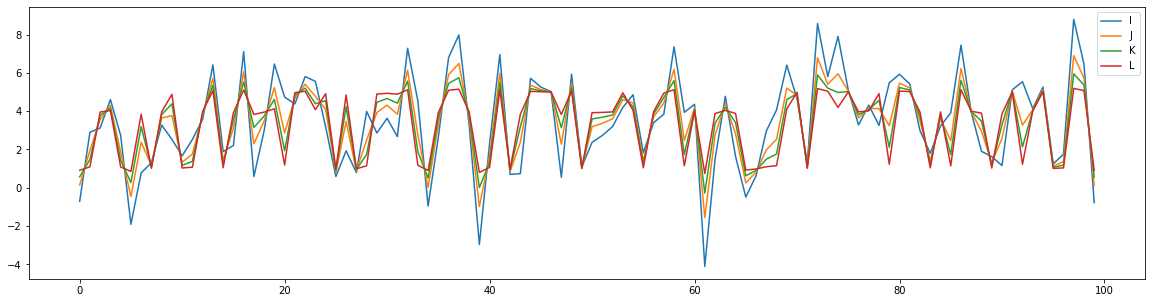

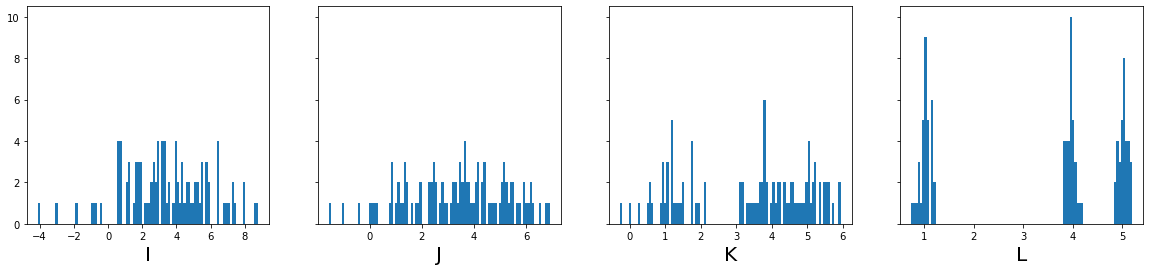

In [10]:
centers = [[1], [4], [5]]

def make_scaled_blobs(n_samples=100, centers=centers, cluster_std=0.4, random_state=0):
    X, labels_true = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)
    #return StandardScaler().fit_transform(X)
    return X

x20 = make_scaled_blobs(cluster_std=2.0)
x10 = make_scaled_blobs(cluster_std=1.0)
x05 = make_scaled_blobs(cluster_std=0.5)
x01 = make_scaled_blobs(cluster_std=0.1)

df = pd.DataFrame(x20,columns=['I'])
df['J']=x10
df['K']=x05
df['L']=x01
df
plt.rcParams["figure.figsize"] = (20,5);
df.plot()
subplots_hist(df,df.columns,bins=100)

for c in df.columns:
    k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df[c],Kmax=10,debug=False)
    print(c,k,e,si)

print()

for c in df.columns:
    k, d, e, si, ls, cs = cluster_Kmeans_optimal(df[c],Kmax=10,debug=False)
    print(c,k,e,si)


In [11]:
k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df['K'],Kmax=10,debug=True)


1 1.0 1.0
2 0.8336607838117776 0.738529941327117
3 0.7870268055755861 0.672839267598818
4 0.9995142227607434 0.5803086634079243
5 1.1171929761108497 0.5458201512005555
6 1.2480614000309094 0.587633866679019
7 1.3845661193686543 0.5750654482743152
8 1.4174097979317926 0.5890108128956871
9 1.713531146960048 0.5641628545894636
10 1.9127926242798643 0.5602976606238893


M 1 None 1.0 [3.2404865850196094]
N 2 0.027492719965382016 0.6542221926667482 [1.070470129806488, 4.564591837540426]
O 2 0.4676036204620897 0.7730769923238598 [1.0271030002068202, 4.478341496497414]
P 3 1.9476910932831943 0.9139103926944715 [1.0006094701675239, 4.9994275798910675, 3.986370516850757]

M 1 None 0.0 [3.2404865850196094]
N 2 None 0.6542221926667482 [1.070470129806488, 4.564591837540426]
O 2 None 0.7730769923238598 [1.0271030002068198, 4.478341496497414]
P 3 None 0.9139103926944715 [1.0006094701675239, 4.9994275798910675, 3.986370516850757]


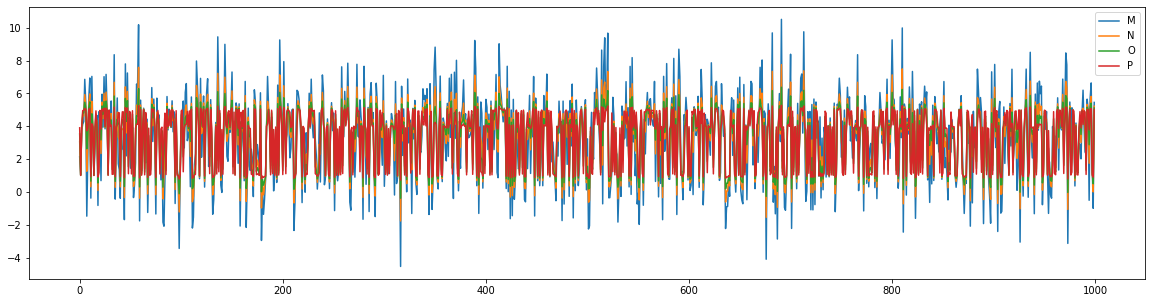

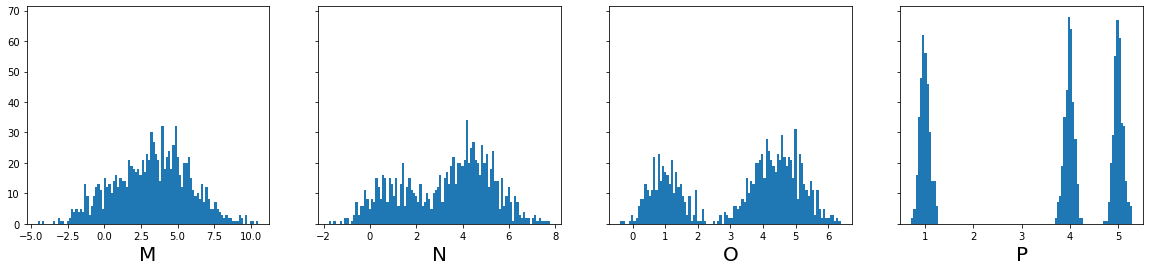

In [12]:
centers = [[1], [4], [5]]

def make_scaled_blobs(n_samples=1000, centers=centers, cluster_std=0.4, random_state=0):
    X, labels_true = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)
    #return StandardScaler().fit_transform(X)
    return X

x20 = make_scaled_blobs(cluster_std=2.0)
x10 = make_scaled_blobs(cluster_std=1.0)
x05 = make_scaled_blobs(cluster_std=0.5)
x01 = make_scaled_blobs(cluster_std=0.1)

df = pd.DataFrame(x20,columns=['M'])
df['N']=x10
df['O']=x05
df['P']=x01
df
plt.rcParams["figure.figsize"] = (20,5);
df.plot()
subplots_hist(df,df.columns,bins=100)

for c in df.columns:
    k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df[c],Kmax=10,debug=False)
    print(c,k,e,si,cs)

print()

for c in df.columns:
    k, d, e, si, ls, cs = cluster_Kmeans_optimal(df[c],Kmax=10,debug=False)
    print(c,k,e,si,cs)



In [13]:
k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df['M'],Kmax=10,debug=True)
print(c,k,e,si,cs)


1 1.0 1.0
2 1.1806123447874284 0.5678373838825842
3 1.2649149643190962 0.5379807772251329
4 1.3419059172411125 0.5370622526540112
5 1.3575513243195965 0.5342834316502129
6 1.4222955382386493 0.5263976737708002
7 1.4476890233111916 0.5310808298192614
8 1.4749680635578195 0.5352183448406852
9 1.5006015770273882 0.5409000405253334
10 1.4756347368804545 0.5435786512717204
P 1 None 1.0 [3.2404865850196094]


### Test weird distribtions

/Users/akolonin/Documents/aigents/pygents/env/lib/python3.7/site-packages/ipykernel_launcher.py:80: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.7/site-packages/ipykernel_launcher.py:80: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.7/site-packages/ipykernel_launcher.py:80: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.7/site-packages/ipykernel_launcher.py:80: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.7/site-packages/ipykernel_launcher.py:

Q 1 None 1.0 [1.0]
R 3 0.0337142985239039 0.6502108302906244 [-0.7776853854153747, 0.8237914530947342, 0.06865463814330774]
S 3 0.01919824086041621 0.6293129652144198 [-0.7337096580581443, 0.8104353413885883, 0.09649667040452593]
T 1 None 1.0 [0.4554865083873183]

Q 1 None 0.0 [1.0]


/Users/akolonin/Documents/aigents/pygents/env/lib/python3.7/site-packages/ipykernel_launcher.py:25: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.7/site-packages/ipykernel_launcher.py:25: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.7/site-packages/ipykernel_launcher.py:25: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.7/site-packages/ipykernel_launcher.py:25: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
/Users/akolonin/Documents/aigents/pygents/env/lib/python3.7/site-packages/ipykernel_launcher.py:

R 2 None 0.6781169217356852 [0.6017515170001061, -0.6705028887990699]
S 2 None 0.6567559382923658 [-0.5316139413045201, 0.6651992557906675]
T 1 None 0.0 [0.4554865083873183]


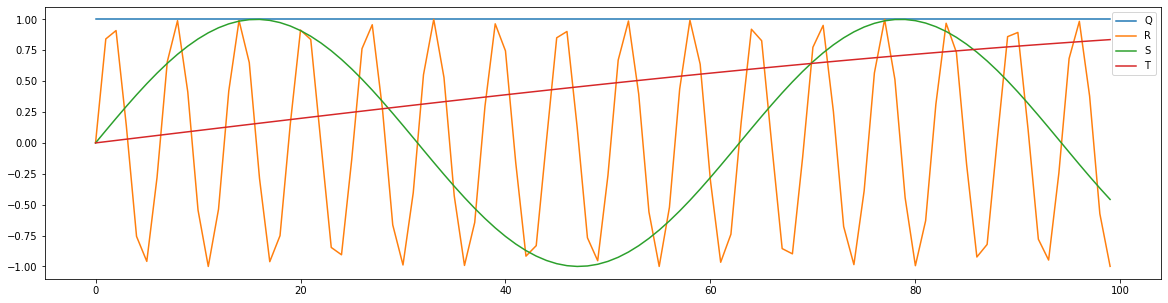

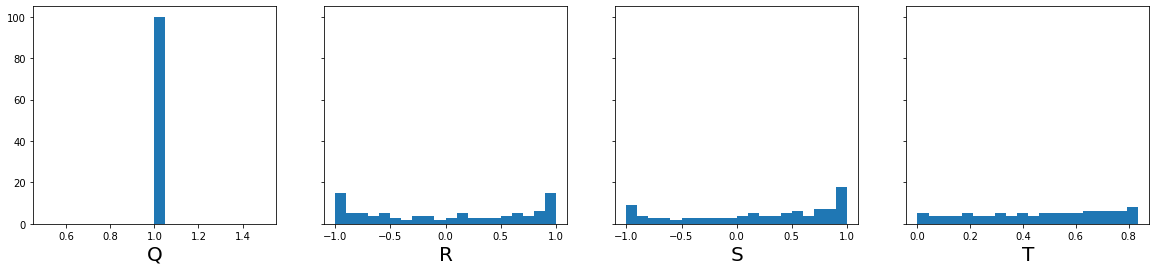

In [14]:
sinc = [1 for x in range(0,100)]
sin1 = [math.sin(x*1.0) for x in range(0,100)]
sin01 = [math.sin(x*0.1) for x in range(0,100)]
sin001 = [math.sin(x*0.01) for x in range(0,100)]
#sin001_2 = [-x*x if x < 0 else x*x for x in sin001]
#df = pd.DataFrame({'sinc':sinc,'sin1':sin1,'sin01':sin01,'sin001':sin001,'sin001_2':sin001_2})
df = pd.DataFrame({'Q':sinc,'R':sin1,'S':sin01,'T':sin001})
df.plot()
subplots_hist(df,df.columns,bins=20)

for c in df.columns:
    k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df[c],Kmax=10,debug=False)
    print(c,k,e,si,cs)

print()

for c in df.columns:
    k, d, e, si, ls, cs = cluster_Kmeans_optimal(df[c],Kmax=10,debug=False)
    print(c,k,e,si,cs)


In [15]:
k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df['T'],Kmax=10,debug=True)
print(c,k,e,si)


1 1.0 1.0
2 1.0191026098875406 0.6290076483312322
3 1.0566673202857184 0.5860301408531655
4 1.1328522697140606 0.5610433264397701
5 1.2192708089310735 0.5439623646817696
6 1.324632618079362 0.5318098363144859
7 1.4598570885998234 0.521928337572381
8 1.6038377316839676 0.5109519108837466
9 1.753671035106779 0.5038180672978578
10 1.9635116941894457 0.4948082000256219
T 1 None 1.0


U 3 0.02185097537663725 0.6423097472382295
W 2 1.7610015849514375 0.8808016162911058
X 1 None 1.0
Y 1 None 1.0

U 2 None 0.6779846666876689
W 2 None 0.8808016162911058
X 3 None 0.6542930312726117
Y 3 None 0.6863572519371363


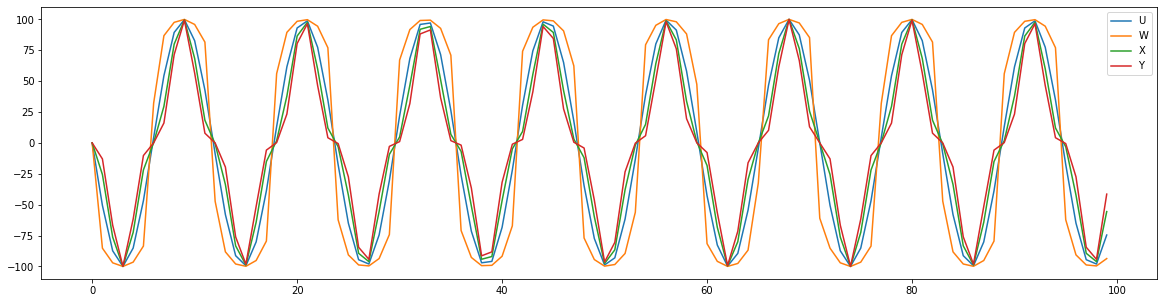

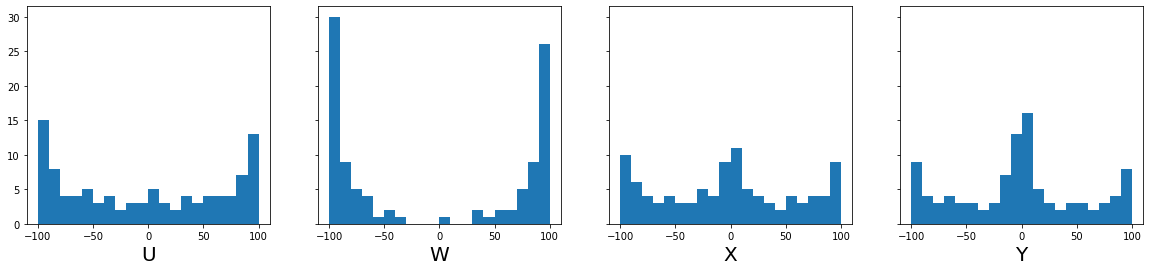

In [16]:
def logsign(v):
    return 0 if v == 0 else -math.log10(-v) if v < 0 else math.log10(v) 

def pow2sign(v):
    return 0 if v == 0 else -v*v if v < 0 else v*v 

def pow3sign(v):
    return v*v*v 

sin = [math.sin(x*100)*100 for x in range(0,100)]
sinlog = [logsign(math.sin(x*100)*100)*50 for x in range(0,100)]
sinpow2 = [pow2sign(math.sin(x*100))*100 for x in range(0,100)]
sinpow3 = [pow3sign(math.sin(x*100))*100 for x in range(0,100)]
df = pd.DataFrame({'U':sin,'W':sinlog,'X':sinpow2,'Y':sinpow3})
df.plot()

subplots_hist(df,df.columns,bins=20)

for c in df.columns:
    k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df[c],Kmax=10,debug=False)
    print(c,k,e,si)

print()

for c in df.columns:
    k, d, e, si, ls, cs = cluster_Kmeans_optimal(df[c],Kmax=10,debug=False)
    print(c,k,e,si)


In [17]:
k, d, e, si, ls, cs = cluster_Kmeans_min_distance(df['X'],Kmax=10,debug=True)
print(c,k,e,si)


1 1.0 1.0
2 1.266614607460961 0.5632634448137044
3 1.0044650388066665 0.6542930312726117
4 1.15556942428214 0.6084403245859783
5 1.2000167126891912 0.6046210716365027
6 1.332597066029245 0.5904617401564036
7 1.4277725298577857 0.5860466469366381
8 1.5778431692282868 0.5848211038828378
9 1.7162762478784481 0.5744643111274317
10 1.9643756414379288 0.5772267477978008
Y 1 None 1.0


### Evaluate with "Fleiss’ kappa" (FK) and "Krippendorff’s alpha" (KA) 
- https://en.wikipedia.org/wiki/Fleiss%27_kappa
- https://stackoverflow.com/questions/51919897/is-fleiss-kappa-a-reliable-measure-for-interannotator-agreement-the-following-r
- https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/s12874-016-0200-9
- https://www.statsmodels.org/dev/generated/statsmodels.stats.inter_rater.fleiss_kappa.html


In [64]:
from statsmodels.stats import inter_rater as irr
import krippendorff as kd

def most_frequent(List):
    return max(set(List), key = List.count)

machine_ratings = [
[1,3,2,2,1,1,3,3,1,2,2,3,1,3,3,1,3,2,1,1],
[1,3,2,2,1,1,2,3,1,2,2,3,1,2,2,1,2,2,3,3]]

# Source:
# https://docs.google.com/forms/d/e/1FAIpQLSeFQDd8Q33FgZvfR7NHFYrSpk4NElWSxRKAuzhQOrhM8D-FHQ/viewform

human_ratings = [
[1,1,2,2,4,4,2,3,1,2,2,3,1,2,2,1,3,2,3,3],
[4,4,4,2,3,2,3,3,1,2,2,3,1,4,4,1,3,2,3,3],
[2,1,2,2,1,1,2,3,1,2,2,3,1,2,2,1,2,2,3,3],
[1,1,2,2,1,1,2,3,1,2,2,3,1,2,2,1,2,2,3,3],
[1,1,2,2,1,1,2,3,1,2,2,3,1,1,1,1,2,2,3,3],
[1,1,2,2,1,1,2,3,1,2,2,3,1,2,2,1,2,2,3,3],
[1,1,2,2,1,1,2,3,1,2,2,3,1,2,1,1,2,2,3,3],
[4,4,4,2,4,4,3,3,1,2,2,3,2,2,2,2,3,2,3,3],
[3,4,2,2,1,1,2,3,1,2,2,3,1,2,2,1,3,2,3,3],
[1,1,2,2,1,1,2,3,1,1,2,3,1,1,1,1,1,2,1,1],
[1,1,2,2,3,1,2,3,1,2,2,3,1,1,1,1,1,2,1,3]]

machine_ratings_by_sample = np.transpose(machine_ratings)
human_ratings_by_sample = np.transpose(human_ratings)

all_human = [most_frequent(list(rs)) for rs in human_ratings_by_sample]
print(all_human)

machine_agg = irr.aggregate_raters(machine_ratings_by_sample) # returns a tuple (data, categories)
human_agg = irr.aggregate_raters(human_ratings_by_sample) # returns a tuple (data, categories)

machine_f_k = irr.fleiss_kappa(machine_agg[0], method='fleiss')
machine_k_a = kd.alpha(machine_ratings,level_of_measurement='nominal')

human_f_k = irr.fleiss_kappa(human_agg[0], method='fleiss')
human_k_a = kd.alpha(human_ratings,level_of_measurement='nominal')

print(machine_f_k,machine_k_a)
print(human_f_k,human_k_a) # 0.58 => 0.41 – 0.60	Moderate agreement / 0.61 – 0.80	Substantial agreement


[1, 1, 2, 2, 1, 1, 2, 3, 1, 2, 2, 3, 1, 2, 2, 1, 2, 2, 3, 3]
0.5488721804511277 0.5601503759398496
0.588563208056105 0.5904333752922136


In [65]:
def kappa_alpha(ratings,digits=2):
    ratings_by_sample = np.transpose(ratings)
    agg = irr.aggregate_raters(ratings_by_sample) # returns a tuple (data, categories)
    f_k = irr.fleiss_kappa(agg[0], method='fleiss')
    k_a = kd.alpha(ratings,level_of_measurement='nominal')
    return(round(f_k,digits),round(k_a,digits))

print('machines',kappa_alpha(machine_ratings))
print('humans',kappa_alpha(human_ratings))
print('distance_humans',kappa_alpha([machine_ratings[0],all_human]))
print('silhouette_humans',kappa_alpha([machine_ratings[1],all_human]))

# 0.41 – 0.60	Moderate agreement
# 0.61 – 0.80	Substantial agreement
# 0.81 – 1.00	Almost perfect agreement


machines (0.55, 0.56)
humans (0.59, 0.59)
distance_humans (0.47, 0.48)
silhouette_humans (0.92, 0.92)


In [38]:
# https://www.statsmodels.org/dev/generated/statsmodels.stats.inter_rater.fleiss_kappa.html
# https://gist.github.com/skylander86/65c442356377367e27e79ef1fed4adee
# https://stackoverflow.com/questions/51919897/is-fleiss-kappa-a-reliable-measure-for-interannotator-agreement-the-following-r

k1_0 = [[4,0,0,0],
    [0,4,0,0],
    [0,0,4,0],
    [0,0,0,4]]
f_k = irr.fleiss_kappa(k1_0, method='fleiss')
print(f_k)

k1_0 = [[4,0,0,0],
    [0,4,0,0],
    [0,0,4,0],
    [1,1,1,1]]
f_k = irr.fleiss_kappa(k1_0, method='fleiss')
print(f_k)

k1_0 = [[4,0,0,0],
    [0,4,0,0],
    [1,1,1,1],
    [1,1,1,1]]
f_k = irr.fleiss_kappa(k1_0, method='fleiss')
print(f_k)

k1_0 = [[4,0,0,0],
    [1,1,1,1],
    [1,1,1,1],
    [1,1,1,1]]
f_k = irr.fleiss_kappa(k1_0, method='fleiss')
print(f_k)

k1_0 = [[1,1,1,1],
    [1,1,1,1],
    [1,1,1,1],
    [1,1,1,1]]
f_k = irr.fleiss_kappa(k1_0, method='fleiss')
print(f_k)



1.0
0.6444444444444445
0.2727272727272727
-0.06666666666666667
-0.3333333333333333
